# Consolidating and Charting Stock Data

Keywords: stock price data

The notebook reads the data downloaded in the previous notebook, extracts the 'adjusted close', and stores the consolidated in a new data file `data/Historical_Adjusted_Close.csv`. 

## Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import pandas as pd

## Loading stock data from data directory

In [2]:
data_dir = os.path.join('data', 'stocks')

stocks = {}
for file in sorted(os.listdir(data_dir)):
    if file.endswith(".csv"):
        s = file.split('.')[0]
        fname = os.path.join(data_dir, file)
        stocks[s] = pd.read_csv(fname, index_col=0)
        stocks[s].set_index(pd.DatetimeIndex(stocks[s].index), inplace=True)

stocks.keys()

dict_keys(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'F', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'])

## Charting

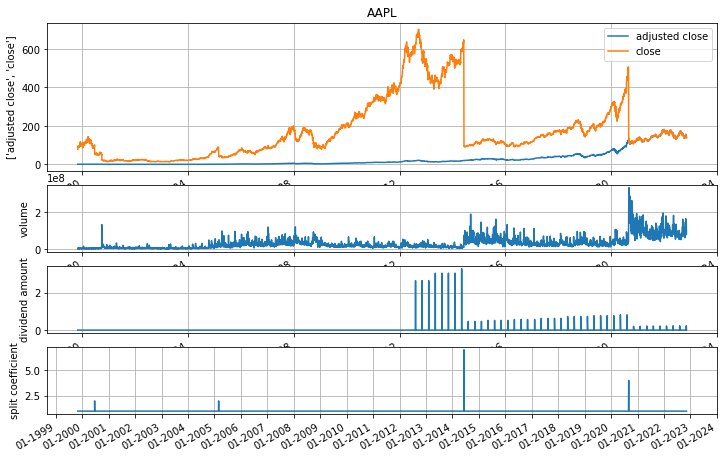

In [3]:
def stock_chart(symbol):
    S = pd.DataFrame.from_dict(stocks[symbol])
    fig = plt.figure(figsize=(12,8))
    ax = [plt.subplot(5,1,(1,2)), plt.subplot(5,1,3), plt.subplot(5,1,4), plt.subplot(5,1,5)]
    for a, s in zip(ax, [['adjusted close', 'close'], 'volume', 'dividend amount', 'split coefficient']):
        S[s].plot(ax=a, grid=True)
        a.set_ylabel(s) 
    ax[0].set_title(symbol)
    ax[-1].xaxis.set_major_locator(mdates.YearLocator())
    ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))  
    
stock_chart('AAPL')

## Consolidating adjusted close data

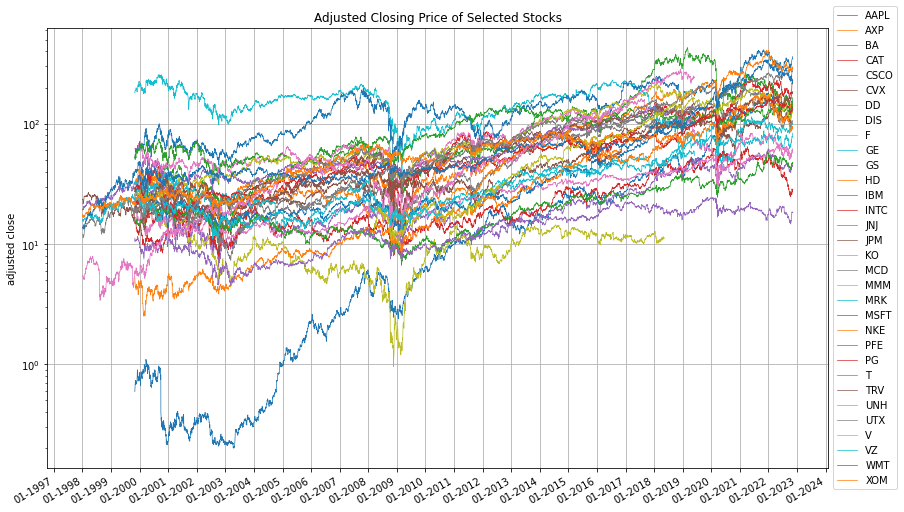

In [4]:
S = pd.concat([stocks[s]['adjusted close'] for s in stocks.keys()], axis=1, keys=stocks.keys())

fig, ax = plt.subplots(figsize=(14,9))
S.plot(ax=ax, lw=0.7, logy=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.set_ylabel('adjusted close')
ax.set_title('Adjusted Closing Price of Selected Stocks')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.grid(True)

S.to_csv(os.path.join('data','Historical_Adjusted_Close.csv'))